# Random forests 

## Classifier on the iris dataset

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import randint
import matplotlib.pyplot as plt
from itertools import combinations, product
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

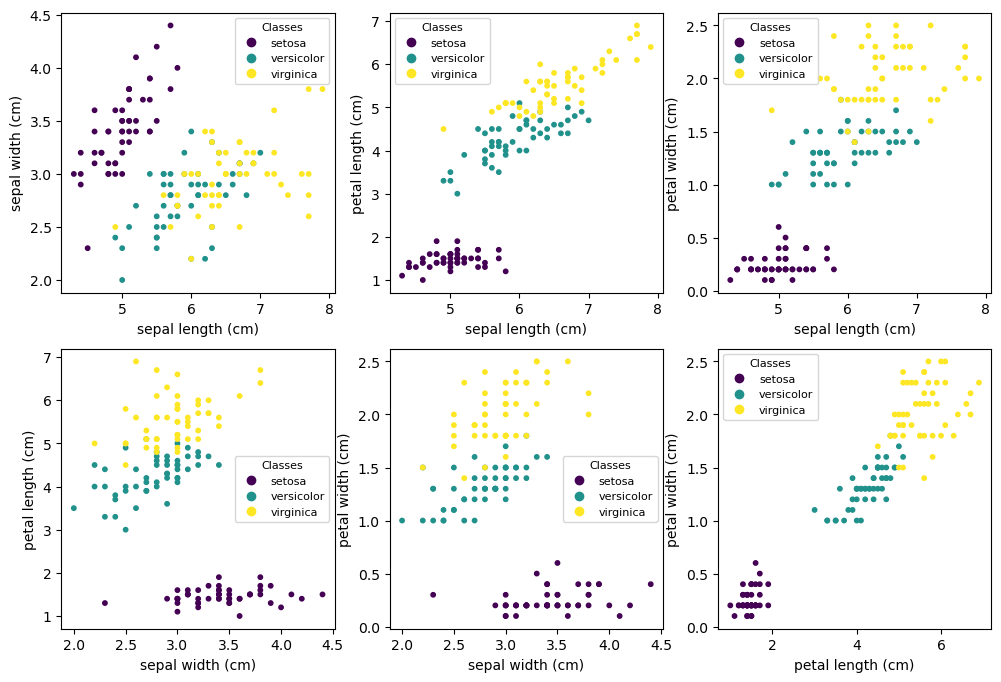

In [2]:
# Load the dataset 

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Plot the dataset

comb = combinations([0, 1, 2, 3], 2)
idxs = list(product([0, 1, 2], repeat=2))
n_r = 2
n_c = 3

fig, axs = plt.subplots(n_r, n_c, figsize=(4*n_c, 4*n_r))

for (i, j), (m, n) in zip(comb, idxs):
    scatter = axs[m, n].scatter(X[:, i], X[:, j], c=iris.target, s=10)
    axs[m, n].set_xlabel(iris.feature_names[i])
    axs[m, n].set_ylabel(iris.feature_names[j])
    axs[m, n].legend(scatter.legend_elements()[0], iris.target_names, loc='best', title='Classes', title_fontsize=8, fontsize=8)

In [3]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Define the model and fit it

model = RandomForestClassifier()
model = model.fit(X_train, y_train)

# Make predictions 

y_pred = model.predict(X_test)

# Assess performance 

score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {score:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [29]:
param_grid = {
    'n_estimators': np.arange(10, 110, 10), 
    'max_depth': np.arange(1, 11, 1)
}

model = RandomForestClassifier()
cv = GridSearchCV(model, param_grid=param_dist, n_jobs=6, cv=5)
cv = cv.fit(X_train, y_train)

In [30]:
best_model = cv.best_estimator_
print(f'Best hyperparameters: {cv.best_params_}')

y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {score:.2f}')
print(classification_report(y_test, y_pred))

Best hyperparameters: {'max_depth': np.int64(2), 'n_estimators': np.int64(40)}
Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<Axes: >

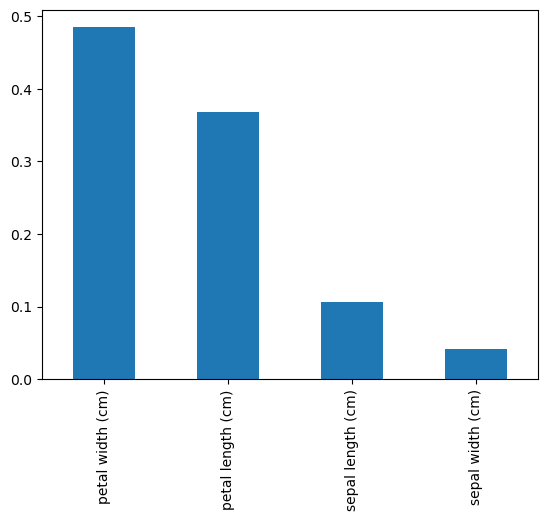

In [9]:
feature_importances = pd.Series(model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_importances.plot.bar()